In [1]:
import numpy as np
import pandas as pd
#%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Data dimensionality, distance-based classifiers
Excercise with mnist digit dataset. Lets first load the data and take a peek:

In [85]:
X_train = pd.read_csv('./data/train_in.csv',header=None)
Y_train = pd.read_csv('./data/train_out.csv',header=None)
df_train = X_train.copy()
df_train['label']=Y_train

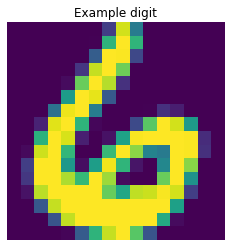

Figure 1: Exapmle of one element in the dataset


In [3]:
def show_number(nr,data):    
    X=np.array(data)
    X=np.reshape(X[nr,:],(16,16))
    imgplot = plt.imshow(X)
    plt.axis('off')
    
    plt.title('Example digit')
    plt.show()
show_number(0,X_train)
print('Figure 1: Exapmle of one element in the dataset')

How big is the difference between numbers?

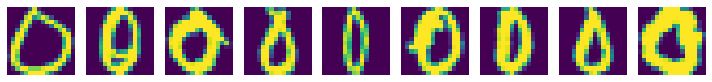

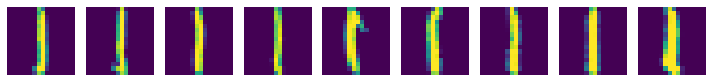

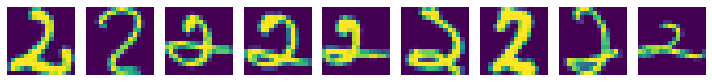

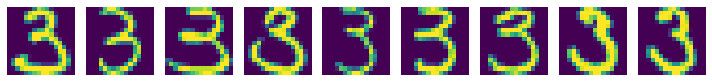

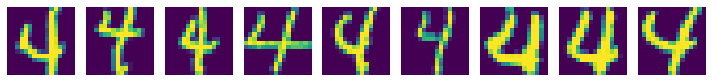

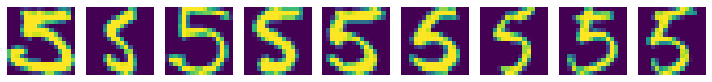

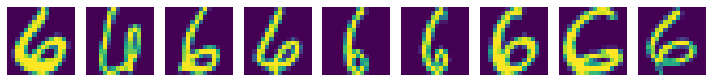

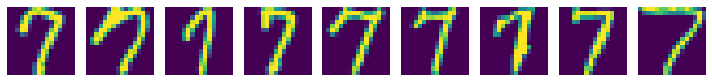

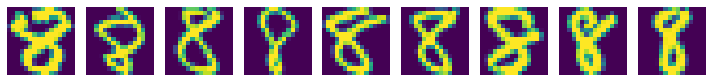

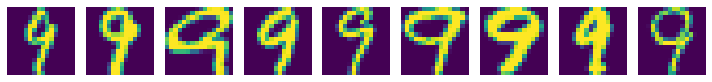

Figure 2: first 9 appearances of each digit


In [4]:
def get_image(nr,data):
    if 'label' in data.columns:
        data=np.array(data.drop('label',axis=1))
    else:
        data=data.values
    return np.reshape(data[nr,:],(16,16))

def display_multiple_img(images, rows = 3, cols=3):
    figure, ax = plt.subplots(nrows=rows,ncols=cols,figsize=(10,10))
    for ind,title in enumerate(images):
        ax.ravel()[ind].imshow(images[title])
        ax.ravel()[ind].set_axis_off()
    plt.tight_layout()
    plt.show()

def display_digits(digit,data,rows,cols):
    total_images = rows*cols
    index=data.loc[data.label==digit].index[:total_images]
    images = {'Image'+str(i):get_image(i,data) for i in index}
    display_multiple_img(images, rows, cols)

    
for i in range(10):
    display_digits(i,df_train,rows=1,cols=9)
print('Figure 2: first 9 appearances of each digit')

For each digit d in range(10) calculate the 'centre': $c_{d}$ as the mean of allcoordinates of vectors constructin $C_{d}$.

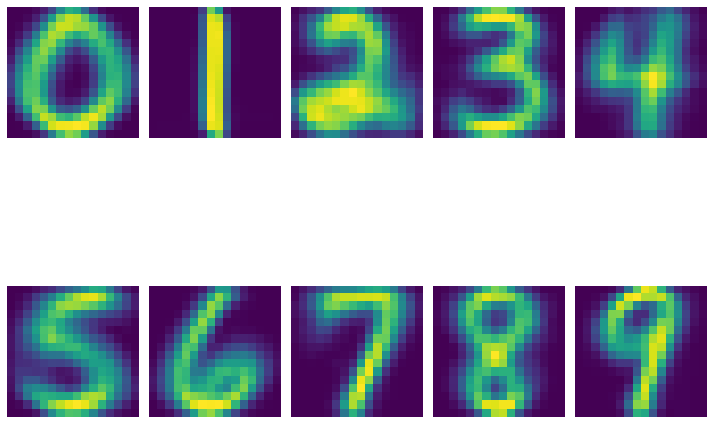

Figure 3: The average digits


In [5]:
c_ds=df_train.groupby('label').mean()

images = {'Image'+str(i):get_image(i,c_ds) for i in range(10)}
display_multiple_img(images, 2,5)
print('Figure 3: The average digits')

Next, calculate the distances between the centers of the 10 clouds, $dist_{ij} = dist(c_{i}; c_{j} )$, for
$i,j = 0,1,...9$.

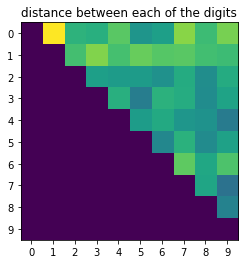

Figure 4: Distances of averages


In [6]:
from itertools import product
dist_ij=np.zeros((10,10))
for i,j in product(range(10),range(10)):
    if j>=i:
        dist_ij[i,j]=np.linalg.norm(c_ds.iloc[i].values-c_ds.iloc[j].values)
imgplot = plt.imshow(dist_ij)
plt.title(label='distance between each of the digits')
plt.xticks(range(10))
plt.yticks(range(10))
plt.show()
print('Figure 4: Distances of averages')

#### Question
Given all these distances, try to say something about the expected accuracy of your
classifier. What pairs of digits seem to be most difficult to separate?
#### Answer
Looking at the graph i would suspect its hard to distinguish between 4 and 9, 7 and 9, 8 and 9, 3 and 5.  

In [7]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, LocallyLinearEmbedding
from matplotlib import cm

In [8]:
#Dimension reduction
pca = PCA(n_components=2)
lle = LocallyLinearEmbedding(n_components=2)
tsne = TSNE(n_components=2)

methods={'pca':pca,'lle':lle,'tsne':tsne}
dfs=dict()
for key in methods:
    X=methods[key].fit_transform(X_train)
    df=pd.DataFrame(X)
    df['label']=Y_train
    dfs[key]=df

In [48]:
def scatter_plot(c_ds,title):
    plt.scatter(c_ds.values[:,0],c_ds.values[:,1],c=Y_train)
    plt.title(title)

In [71]:
def scatter_plot(c_ds,title):
    fig, ax = plt.subplots()
    colors={0:'tab:red',1:'tab:blue',2:'tab:orange',3:'tab:green',4:'tab:purple',5:'tab:brown',6:'tab:pink',7:'tab:gray',8:'tab:olive',9:'tab:cyan'}
    for key in colors:
        x=c_ds.loc[c_ds.label==key].values[:,0]
        y=c_ds.loc[c_ds.label==key].values[:,1]
        ax.scatter(x,y, c=colors[key], label=key,
                   alpha=0.3, edgecolors='none')
    
    
    average=c_ds.groupby('label').mean()
    ax.scatter(average.values[:,0],average.values[:,1])
    for i in range(10):
        label = f"{c_ds.index[i]}"
        plt.annotate(label, # this is the text
             (average.values[i,0],average.values[i,1]), # this is the point to label
             textcoords="offset points", # how to position the text
             xytext=(0,10), # distance from text to points (x,y)
             ha='center') # horizontal alignment can be left, right or   
    ax.legend()
    plt.title(title)
    plt.show()

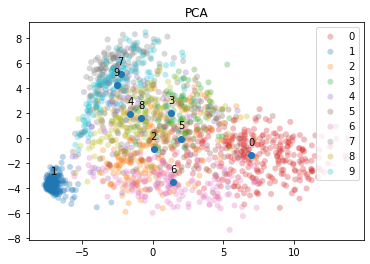

In [72]:
scatter_plot(dfs['pca'],'PCA')

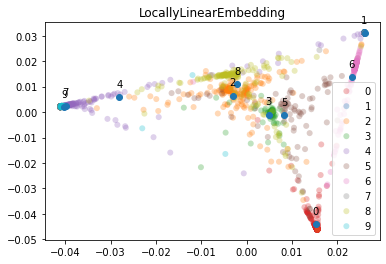

In [73]:
scatter_plot(dfs['lle'],'LocallyLinearEmbedding')

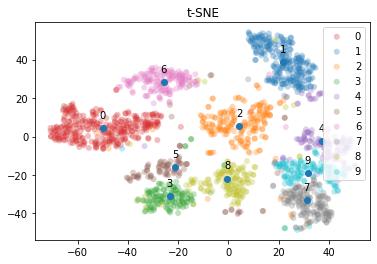

In [74]:
scatter_plot(dfs['tsne'],'t-SNE')

In [77]:
df_inf=pd.DataFrame()
for i in range(10):
    df=X_train-c_ds.iloc[i]
    df_inf[i]=np.sqrt(np.multiply(df.abs(),df.abs()).sum(axis=1))
df_inf

,0,1,2,3,4,5,6,7,8,9
0,10.775343,15.382765,12.442124,13.565305,13.801060,11.648341,8.374793,15.958980,13.716205,15.588175
1,13.042792,18.693651,14.592786,13.766085,16.889340,12.371951,15.330994,16.799755,15.632938,16.601801
2,13.625241,16.146386,12.211555,13.167415,9.521794,12.630480,12.228531,12.877055,12.917250,12.436665
3,13.680419,12.733610,11.513550,11.257821,10.099275,11.794416,13.423057,6.435935,10.084407,6.952273
4,12.641107,15.251902,11.987980,8.102630,14.033999,10.597402,13.054109,14.207000,11.865777,13.152619
...,...,...,...,...,...,...,...,...,...,...
1702,13.833463,11.201195,10.543662,10.681983,11.361148,11.160706,11.848500,12.398731,7.992859,10.795493
1703,13.994200,9.594817,10.973975,11.538954,9.506348,11.243344,12.289461,10.460990,8.992205,7.494314
1704,14.165019,11.975320,10.754087,10.689856,9.554619,11.568231,12.618434,6.050332,10.364465,7.071513
1705,14.447300,11.513735,11.429374,11.852311,11.367451,11.862008,13.323193,10.791623,9.203248,8.059518


In [78]:
prediction=np.zeros(1707)
for i,x in enumerate(df_inf.min(axis=1)):
    prediction[i]=list(df_inf.iloc[i]).index(x)
prediction

array([6., 5., 4., ..., 7., 9., 8.])

In [86]:
score_train=(len(Y_train)-np.sum(prediction-Y_train.values.T))/len(Y_train)
score_train

0.8980667838312829

In [87]:
X_test = pd.read_csv('./data/test_in.csv',header=None)
Y_test = pd.read_csv('./data/test_out.csv',header=None)

In [88]:
df_inf=pd.DataFrame()
for i in range(10):
    df=X_test-c_ds.iloc[i]
    df_inf[i]=np.sqrt(np.multiply(df.abs(),df.abs()).sum(axis=1))
prediction=np.zeros(len(X_test))
for i,x in enumerate(df_inf.min(axis=1)):
    prediction[i]=list(df_inf.iloc[i]).index(x)

score_test=(len(Y_test)-np.sum(prediction-Y_test.values.T))/len(Y_test)
score_test

0.833

In [90]:
distances=[]
for i in range(9):
    distances.append(np.linalg.norm(X_train.iloc[0]-c_ds.iloc[i].values))
print(distances.index(min(distances)))


6


In [91]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, Y_train.values.ravel())

KNeighborsClassifier(n_neighbors=1)

In [92]:
Y_pred=neigh.predict(X_test)

In [93]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))


              precision    recall  f1-score   support

           0       0.93      0.98      0.95       224
           1       0.96      0.98      0.97       121
           2       0.92      0.83      0.87       101
           3       0.84      0.90      0.87        79
           4       0.94      0.90      0.92        86
           5       0.91      0.75      0.82        55
           6       0.94      0.93      0.94        90
           7       0.82      0.92      0.87        64
           8       0.92      0.85      0.88        92
           9       0.91      0.95      0.93        88

    accuracy                           0.92      1000
   macro avg       0.91      0.90      0.90      1000
weighted avg       0.92      0.92      0.91      1000



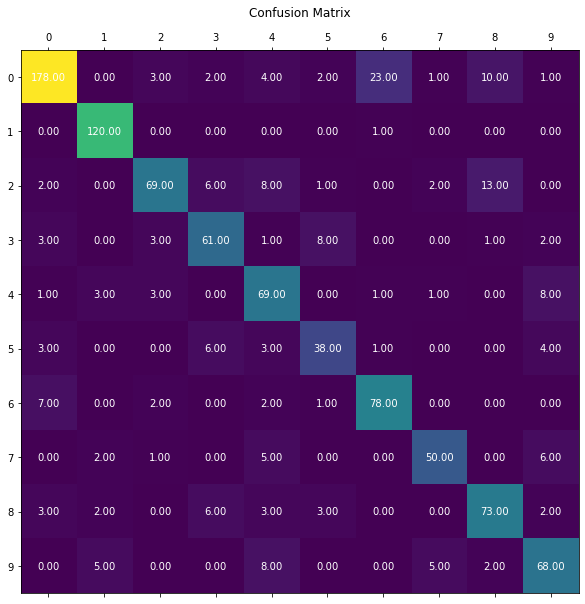

In [110]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
conf_matrix=confusion_matrix(Y_test,prediction)#confusion matrix distance based classifier
def plot_conf_matrix(conf_matrix):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.matshow(conf_matrix, aspect='auto')
    ax.set(title='Confusion Matrix', xticks=range(10), 
           yticks=range(10))
    for (i, j), val in np.ndenumerate(conf_matrix):
        ax.annotate('{:0.2f}'.format(val), (j,i), ha='center', va='center',color='white')
plot_conf_matrix(conf_matrix)

In [112]:
biasd = {'bias':(np.ones(1707))}
biasdf = pd.DataFrame(biasd)

In [113]:
biasdf

,bias
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
1702,1.0
1703,1.0
1704,1.0
1705,1.0


In [116]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,-0.167,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,-1.000,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.996,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,-0.067,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,0.234,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1702,-1.0,-1.0,-1.0,-1.000,-1.000,-0.889,0.497,0.988,0.244,-0.861,...,0.401,0.752,1.000,0.609,0.206,-0.974,-1.000,-1.000,-1.000,-1.0
1703,-1.0,-1.0,-1.0,-1.000,-1.000,-0.961,-0.211,0.647,0.464,-0.071,...,-0.983,0.635,0.236,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
1704,-1.0,-1.0,-1.0,-1.000,-0.948,-0.307,-0.718,-0.178,0.543,1.000,...,-0.822,0.720,-0.716,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
1705,-1.0,-1.0,-1.0,-1.000,-1.000,-0.806,0.417,1.000,0.627,-0.559,...,0.491,0.866,-0.712,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0


In [118]:
X_train.append(biasdf) #dit gaat niet goed
pd.concat([X_train,biasdf],axis=1)

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,bias
0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,-0.167,...,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0,1.0
1,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,-1.000,...,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0,1.0
2,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.996,...,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0,1.0
3,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,-0.067,...,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,1.0
4,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,0.234,...,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1702,-1.0,-1.0,-1.0,-1.000,-1.000,-0.889,0.497,0.988,0.244,-0.861,...,0.752,1.000,0.609,0.206,-0.974,-1.000,-1.000,-1.000,-1.0,1.0
1703,-1.0,-1.0,-1.0,-1.000,-1.000,-0.961,-0.211,0.647,0.464,-0.071,...,0.635,0.236,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,1.0
1704,-1.0,-1.0,-1.0,-1.000,-0.948,-0.307,-0.718,-0.178,0.543,1.000,...,0.720,-0.716,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,1.0
1705,-1.0,-1.0,-1.0,-1.000,-1.000,-0.806,0.417,1.000,0.627,-0.559,...,0.866,-0.712,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,1.0
